### Soal Respon Modul 7
Lakukan proses Dilasi, Erosi, Opening dan Closing pada Gambar 'anggur.png' dengan kernel berukuran 3 x 3 (semua nilai di dalamnya adalah 1)

In [49]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Baris code di atas ini digunakan untuk mengimpor fungsi-fungsi yang akan digunakan dengan perincian
- numpy digunakan untuk membantu dalam membaca gambar ke dalam bentuk array.
- cv2 atau OpenCV berfungsi untuk melakukan konversi color space.
- matplotlib.pyplot digunakan untuk membuat visualisasi data dalam bentuk grafik, diagram, atau gambar.

Text(0.5, 1.0, 'Citra awal')

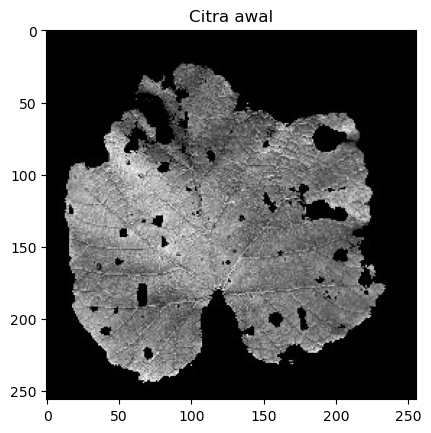

In [50]:
img = plt.imread('anggur.jpg')
image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap = 'gray')
plt.title('Citra awal')

Script di atas ini digunakan untuk mentransformasi colorspace citra. Dimana digunakan beberapa function yaitu :
1. imread merupakan function yang ada pada library "matplotlib" yang digunakan untuk membaca citra lalu menyimpannya pada variabel "img".
2. cvtColor merupakan sebuah function yang ada pada library "cv2" yang digunakan untuk mentransformasi colorspace citra yang ada pada variabel "img".
3. imshow merupakan sebuah function yang ada pada library "matplotlib" yang digunakan untuk menampilkan citra hasil transformasi yang ada pada variabel "image" dengan kondisi tambahan menggunakan colormap dengan warna "gray".

In [51]:
kernel = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

Fungsi dari script di atas yaitu untuk membuat kernel atau poros dengan ukuran 3x3 dengan semua nilai didalamnya adalah 1.

In [52]:
def toBiner(image):
    result = np.zeros(image.shape).astype(int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(image[i, j] > 128):
                result[i, j] = 255
            elif (image[i, j] <= 128):
                result[i, j] = 0
    return result
image = toBiner(image)

Script di atas yaitu membuat fungsi untuk mengkonversi gambar menjadi citra biner dikarenakan ketika melakukan operasi morfologi pada poros atau kernel nya bernilai 1 atau 0 yang menggambarkan suatu citra biner. Untuk melakukan konversi kita perlu menentukan ambang batasnya yaitu 128 yang dimana ketika suatu piksel bernilai lebih dari 128 akan diberikan warna putih atau 255 jika piksel kurang dari atau sama dengan 127 maka piksel tersebut diberi nilai 0 atau warna hitam. Pada function ini kita perlu menyiapkan variabel hasil dan kita perlu melakukan perulangan untuk mengakses semua piksel dari citra untuk melakukan pengecekan nilai pikselnya.

In [53]:
def getMidPointOf (kernel):
    i = (kernel.shape[1])//2
    j = (kernel.shape[0]-1)//2
    return i,j

Pada function di atas berfungsi untuk mendapatkan koordinat titik tengah suatu kernel atau poros yang telah diberikan, untuk mendapatkan nilai i kita perlu membagi 2 dari panjang baris dari suatu kernel begitu pula untuk nilai j kita perlu membagi dua panjang kolom dari kernel.

In [54]:
def dilasi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    mid1 = getMidPointOf(kernel)[0]
    mid2 = getMidPointOf(kernel)[1]
    for i in range (image.shape[0]-kernel.shape[1]):
        for j in range (image.shape[1]-kernel.shape[0]):
            if(image[i+mid1, j+mid2]) == 255:
                for k in range (kernel.shape[0]):
                    for l in range (kernel.shape[1]):
                        if(kernel[k, l]) == 1:
                            result[i+k, j+l] = 255
    return result

Pada function di atas berfungsi untuk melakukan operasi dilasi pada suatu citra yang dimana kita perlu menyiapkan variabel untuk menyimpan nilai hasil kemudian untuk menyimpan nilai koordinat titik tengah dari kernel, pada opersi ini cara mengaksesnya sama seperti konvolusi jadi untuk dua perulangan pertama tidak akan melakukan perulangan sepanjang semua indeks dari citra namun dibatas dengan dikurangi dengan panjang dari kernel supaya mencegah terjadi indeks out of bound. Pada proses dilasi ketika citra berada pada titik tengah pada jangkauan kernel tiap iterasi harus bernilai putih (255/1), jika itu terpenuhi maka pada koordinat tetangga dari kernel yang bernilai 1 maka pada citra yang dalam jangkauan kernel periterasi pada koordinat yang sama akan diubah menjadi 255 atau putih. Pada operasi dilasi nantinya citra akan menjadi keliatan lebih tebal dari citra asli.

Text(0.5, 1.0, 'Dilasi')

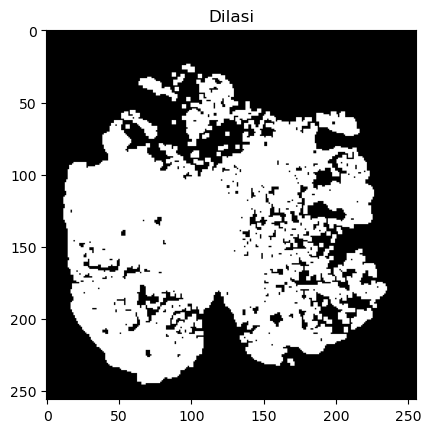

In [55]:
imageDilasi = dilasi(image, kernel)
plt.imshow(imageDilasi, cmap = 'gray')
plt.title('Dilasi')

Script di atas ini merupakan code yang digunakan untuk menampilkan hasil proses dilasi yang telah dilakukan. Terdapat "imshow" dimana function ini dimiliki oleh library matplotlib yang digunakan untuk menampilkan citra yang telah melalui proses dilasi. Terdapat pula "title" dimana function ini dimiliki oleh library matplotlib yang digunakan untuk memberikan judul pada citra.

In [56]:
def erosi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    mid1 = getMidPointOf(kernel)[0]
    mid2 = getMidPointOf(kernel)[1]
    for i in range (image.shape[0]-kernel.shape[1]):
        for j in range (image.shape[1]-kernel.shape[0]):
            if(image[i+mid1, j+mid2]) == 255:
                result[i+mid1, j+mid2] = 255
                for k in range (kernel.shape[0]):
                    for l in range (kernel.shape[1]):
                        if(kernel[k,l]) == 1 and (image[i+k, j+l] != 255):
                            result[i+mid1, j+mid2]=0
    return result

Pada function di atas berfungsi untuk melakukan operasi erosi pada suatu citra yang dimana kita perlu menyiapkan variabel untuk menyimpan nilai hasil kemudian untuk menyimpan nilai koordinat titik tengah dari kernel, pada operasi ini cara mengaksesnya sama seperti konvolusi jadi untuk dua perulangan pertama tidak akan melakukan perulangan sepanjang semua indeks dari citra namun dibatas dengan dikurangi dengan panjang dari kernel supaya mencegah terjadi indeks out of bound. Pada proses erosi ketika citra berada pada titik tengah pada jangkauan kernel tiap iterasi harus bernilai putih (255/1), jika itu terpenuhi maka pada koordinat tetangga dari kernel yang bernilai 1 maka pada citra yang dalam jangkauan kernel periterasi pada koordinat yang sama harus juga bernilai 255 atau warna putih jika tidak memenuhi walaupun hanya satu piksel maka secara otomatis titik tengah citra tersebut pada jangkauan kernel periterasi tersebut akan langsung diubah nilainya menjadi 0 atau hitam, setelah itu tidak perlu melakukan pengecekan lagi pada tetangga lain pada satu iterasi tersebut dan akan dilanjutkan ke iterasi selanjutnya.

Text(0.5, 1.0, 'Erosi')

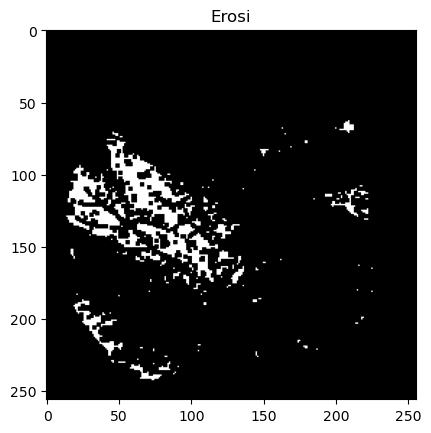

In [57]:
imageErosi = erosi(image, kernel)
plt.imshow(imageErosi, cmap = 'gray')
plt.title('Erosi')

Script di atas ini merupakan code yang digunakan untuk menampilkan hasil proses erosi yang telah dilakukan. Terdapat "imshow" dimana function ini dimiliki oleh library matplotlib yang digunakan untuk menampilkan citra yang telah melalui proses erosi. Terdapat pula "title" dimana function ini dimiliki oleh library matplotlib yang digunakan untuk memberikan judul pada citra.

In [58]:
def opening(image, kernel):
    result = erosi(image, kernel)
    result = dilasi(result, kernel)
    return result

Pada function di atas berfungsi untuk melakukan operasi opening pada citra yang dimana pada operasi opening suatu citra dilakukan operasi erosi terlebih dahulu setelah itu dilakukan operasi dilasi. Jadi pada function ini kita hanya perlu memanggil function dilasi dan erosi yang telah dibuat sebelumnya.

Text(0.5, 1.0, 'Opening')

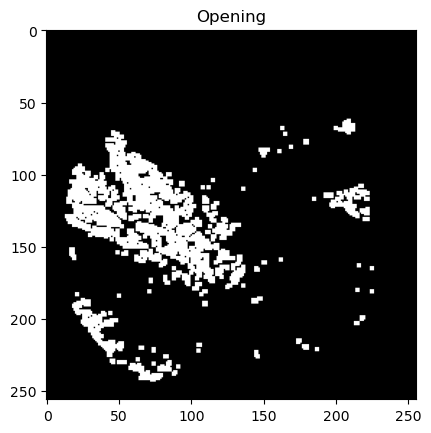

In [59]:
imageOpening = opening(image, kernel)
plt.imshow(imageOpening, cmap = 'gray')
plt.title('Opening')

Script di atas ini merupakan code yang digunakan untuk menampilkan hasil proses opening yang telah dilakukan. Terdapat "imshow" dimana function ini dimiliki oleh library matplotlib yang digunakan untuk menampilkan citra yang telah melalui proses opening. Terdapat pula "title" dimana function ini dimiliki oleh library matplotlib yang digunakan untuk memberikan judul pada citra.

In [60]:
def closing(image, kernel):
    result = dilasi(image, kernel)
    result = erosi(result, kernel)
    return result

Pada function di atas berfungsi untuk melakukan operasi closing pada citra yang dimana pada operasi closing suatu citra dilakukan operasi dilasi terlebih dahulu setelah itu dilakukan operasi erosi. Jadi pada function ini kita hanya perlu memanggil function dilasi dan erosi yang telah dibuat sebelumnya.

Text(0.5, 1.0, 'Closing')

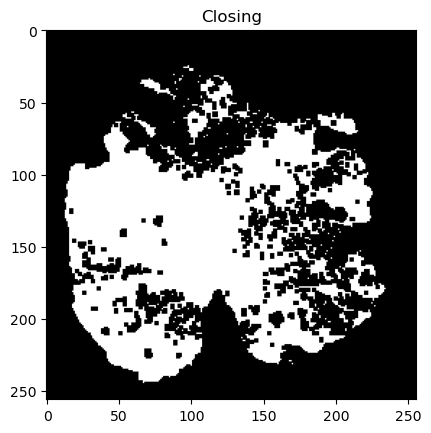

In [61]:
imageClosing = closing(image, kernel)
plt.imshow(imageClosing, cmap = 'gray')
plt.title('Closing')

Script di atas ini merupakan code yang digunakan untuk menampilkan hasil proses closing yang telah dilakukan. Terdapat "imshow" dimana function ini dimiliki oleh library matplotlib yang digunakan untuk menampilkan citra yang telah melalui proses closing. Terdapat pula "title" dimana function ini dimiliki oleh library matplotlib yang digunakan untuk memberikan judul pada citra.